# Interactive in-place 2D plotting/replotting with plotly widget. 
**This is a prototype, useful, e.g. for output functions of ODE solvers, optimisers, etc.** <br>
This is also in the spirit of exploratory data analysis

* Draw curve
* Draw point on curve
* Move point along curve, updating in real time

## Operational Notes

1. Work in JupyterLab: this allows to position figure like in MATLAB, on the side.
1. To get drop-down help: 
    * for methods/attributes, press Tab after obj.
    * for method doc-strigs, Shift+Tab after fun()
1. If drop-down help does not work, try this magic:<br>
        %config Completer.use_jedi = False

## Plotly notes

1. For static 2D plots the workflow is to construct go.Figure object, e.g.<br>
        f = go.Figure(go.Scatter(x=t, y=np.sin(t)))
    
    Note that go.Scatter is probably just a dataframe used in the constructor of go.Figure. After go.Figure object is created, it would have no connection with go.Scatter object

    * To display, simply execute<br>
        f

    * To add another curve<br>
        f.add_trace(go.Scatter(x=[t[0]], y=[np.sin(t[0])]))

    * To customise f, operate on its .data attribute, e.g., 
    
        f.data[0].mode = 'lines'
        To get auto-complete, create a pointer: curve1=f.data[0], then explore its available properties by pressing Tab and Shift+Tab, e.g., curve1.<+Tab> or curve1.mode<Shift+Tab> will reveal all possibilities and syntax
                
1. To have an interactive figure fixed in a dedicated window (rather than replotting in a new cell each time data is changed), work with the **widget object**: go.FigureWidget, calling its constructor on go.Figure (not px.<...>):
        fig = go.FigureWidget(go.Figure(...))
    Now changing any attribute, will be directly reflected on the plot, e.g. 
        fig.data[0].x  = [0]
        fig.data[0].y  = [0]

1. Notice that upon creation, fig.data[i] is a tuple, but can be any iteratble, that's why assignment of it to np.array works

1. Notice that assigning attributes based on other attributes is a bad idea, because the updates are asynchronous. E.g. compare code below advancing a point along y=sin(x):

    **PROPER:**
    
        for i in range(11):
            with f.batch_update():
                phi = 2*np.pi/10*i-np.pi
                f.data[1].x=[phi]
                f.data[1].y=[np.sin(phi)]
                f.layout.title.text = str(i)
            sleep(.5)
   
   **FAULTY:**
   
        for i in range(11):
            with f.batch_update():
                f.data[1].x=[phi]
                f.data[1].y=[f.data[1].x]
                f.layout.title.text = str(i)
            sleep(.5)
1. fds

In [2]:
%config Completer.use_jedi = False

In [3]:
import numpy as np

import plotly.graph_objs as go
from time import sleep

In [5]:
t = np.arange(-np.pi,np.pi,np.pi/100)

## Understand go.Figure object
* Generate line-plot
* Switch between line and line+marker

In [17]:
# This seems a bad idea. I can't make it work
#l1 = go.scatter.Line({'x': t, 'y': np.sin(t)});

**Note: no need for s1, because after fig=go.Figure(s1), s1 and fig will not be related!**

In [12]:
s1 = go.Scatter(x=t,
                y=np.sin(t))

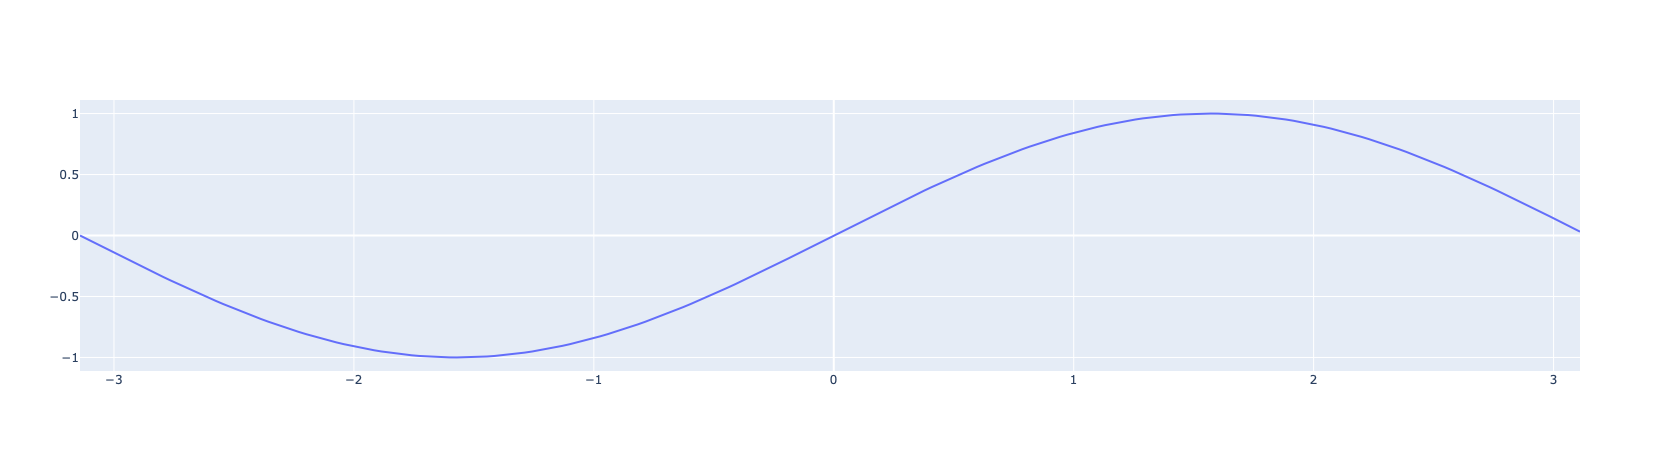

In [26]:
fig = go.Figure(s1)
fig

### Let's re-draw with markers and lines

**A wrong approach:** Simply changing s1.mode will not affect anything. Probably, the constructor of go.Figure simply reads data off of go.Scatter object and does not embed it.

In [32]:
s1.mode='markers'

markers


Looking at the fig.data[0] attributes, we see that s1.mode has no affect. The two objects are detached. We also create a f0 as pointer to fig.data[0] to benefit from drop-down help

In [39]:
f0 = fig.data[0]

In [41]:
print(f0.mode)

None


To change attributes of fig, we must operate directly on it:

In [63]:
f0.mode = 'markers'

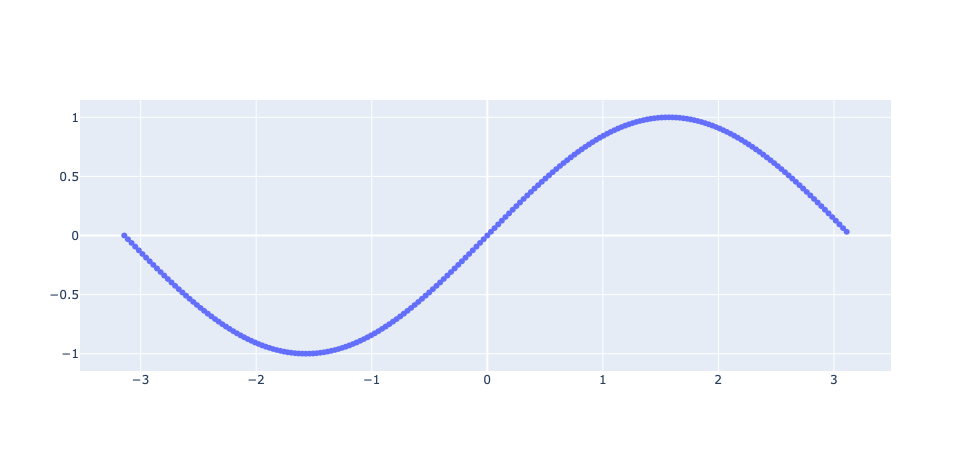

In [64]:
fig

## Let's redo everything concisely: 
* plotting a function cos(t)
* customising it

In [84]:
fig1 = go.Figure(go.Scatter(x=t,
                            y=np.cos(t)))

In [85]:
curve1 = fig1.data[0]

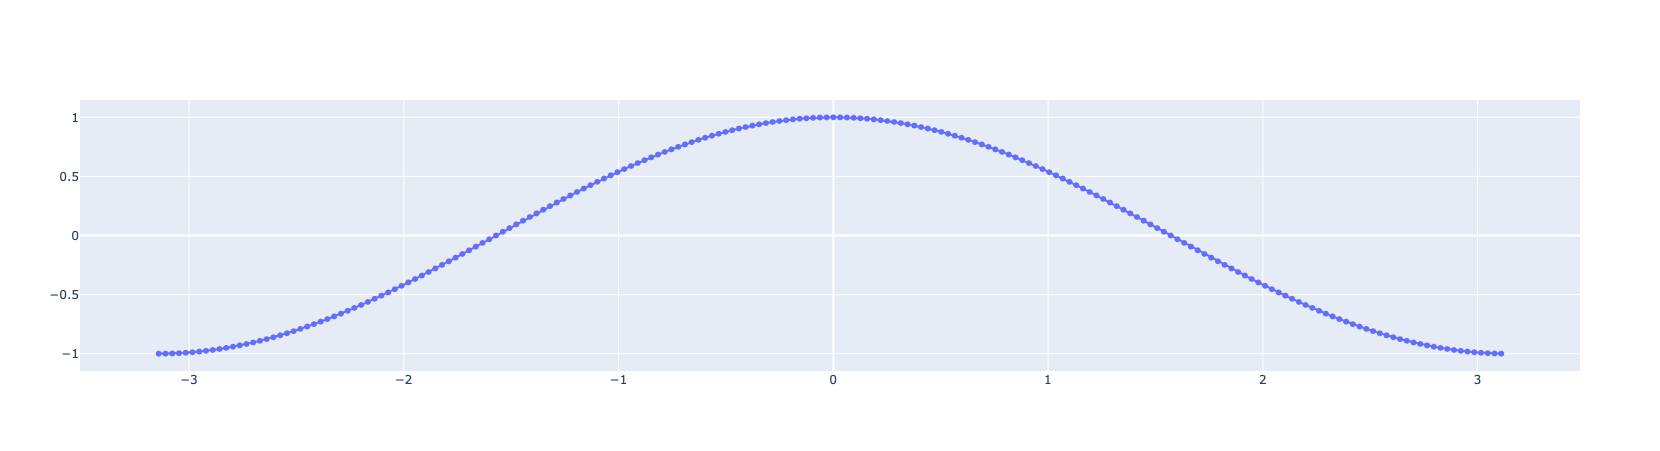

In [86]:
curve1.mode = 'lines+markers'
fig1

If we remember the properties by heart, we can simply operate directly with the go.Figure - object:

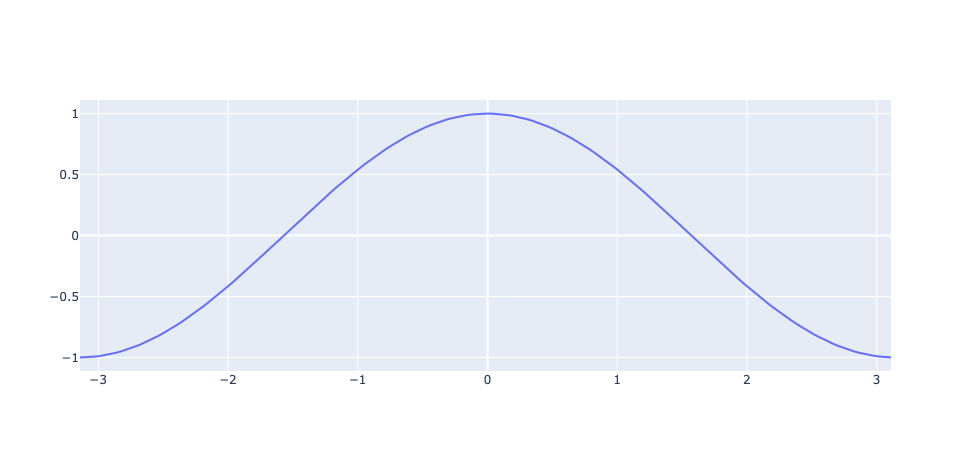

In [82]:
fig1.data[0].mode = 'lines'
fig1

# Understand go.FigureWidget object

### Create a go.FigureWidget object from go.Figure

In [88]:
fig0 = go.Figure(go.Scatter(x=t,y = np.sin(t)))
fig0.add_trace(go.Scatter(x=[t[0]], y=[np.sin(t[0])]))

fig = go.FigureWidget(fig0)
fig

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '87cc417f-85e5-4296-9a5d-bda1a2855a5f',
 …

Trying to make y = sin(t) dashed. Let's operate on fig0

In [90]:
c1 = fig0.data[0]

In [91]:
c1.line.dash = 'dash'

Operating on fig0 did not work. It changes fig0, but not the interactive figure widget:

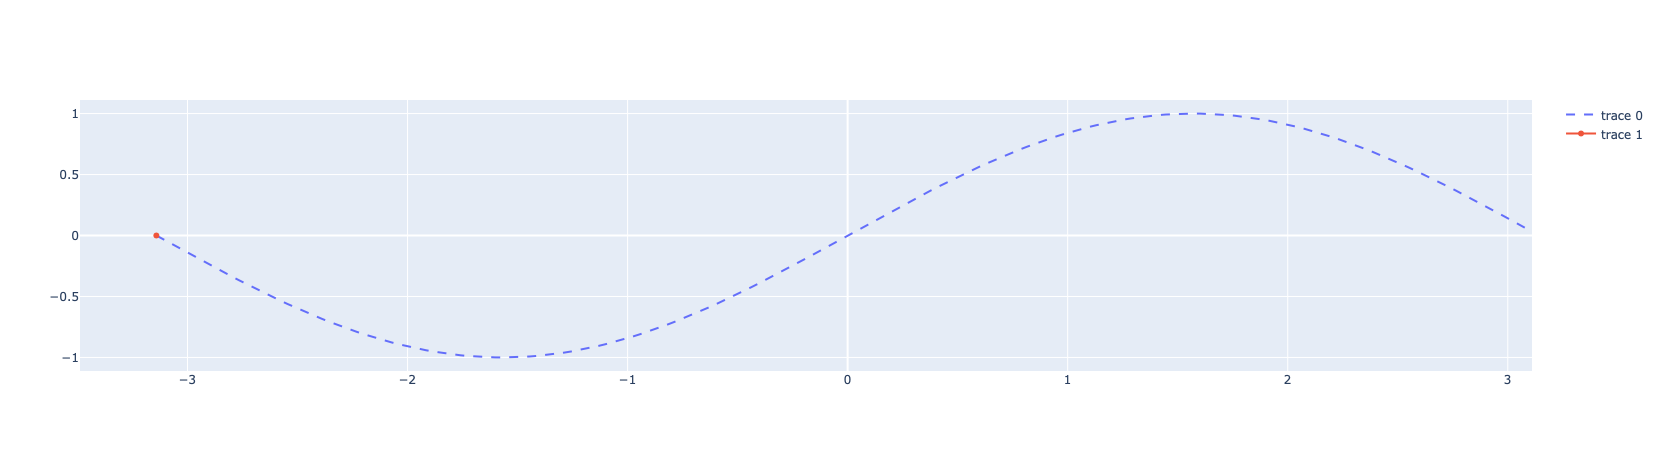

In [92]:
fig0

Let's try to do the same with the widget. This shows that there is no need to create fig0. 

In [95]:
fig.data[0].line.dash = 'dash'

**Let's make the red dot move**

In [99]:
for i in range(t.size):
    fig.data[1].x = [t[i]]
    fig.data[1].y = [np.sin(t[i])]
    #sleep(.1)
  

In [103]:
fig.layout.title ='$y=sin(x)$'

fig.layout.titlefont.family = 'LaTex'

fig.layout.xaxis.title = '$x$'

## Let's do the same without extra variables
* Plot y = sin(x) with dashed line
* Trace a red dot along it

In [6]:
f = go.FigureWidget(go.Figure(go.Scatter(x=t, y= np.sin(t))))
f.data[0].line.dash = 'dash'
f.add_trace(go.Scatter(x=[t[0]], y = [np.sin(t[0])]))

FigureWidget({
    'data': [{'line': {'dash': 'dash'},
              'type': 'scatter',
              'uid': '…

# Updating live

In [42]:
f

FigureWidget({
    'data': [{'line': {'dash': 'dash'},
              'type': 'scatter',
              'uid': '…

In [32]:
for i in range(11):
    with f.batch_update():
        phi = 2*np.pi/10*i-np.pi
        f.data[1].x=[phi]
        f.data[1].y=[np.sin(phi)]
        f.layout.title.text = str(i)
    sleep(.2)

### Shorter code

In [40]:
for i in range(11):
    with f.batch_update():
        phi = 2*np.pi/10*i-np.pi
        f.data[1].update(x=[phi],y = [np.sin(phi)])
        f.layout.title.text = str(i)
    sleep(.4)

### Animate

In [45]:
for i in range(11):
    with f.batch_animate(easing='cubic'):
        phi = 2*np.pi/10*i-np.pi
        f.data[1].update(x=[phi],y = [np.sin(phi)])
        f.layout.title.text = str(i)
    